In [1]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture

In [2]:
# Настройка стилей для графиков
sns.set(style="whitegrid")

In [3]:
# Загрузка данных Iris (замените на свой датасет, если нужно)
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Преобразование в DataFrame для удобства работы
df = pd.DataFrame(X, columns=iris.feature_names)

In [5]:
# Функция для визуализации кластеров
def plot_clusters(X, y_pred, title, centroids=None):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k')
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids')
    plt.title(title)
    plt.xlabel('Feature 1: Sepal Length')
    plt.ylabel('Feature 2: Sepal Width')
    plt.legend()
    plt.show()

In [6]:
# 1. Алгоритм K-Means (частичная кластеризация)
print("1. K-Means Clustering")
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

1. K-Means Clustering


C:\Users\Alexandr\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


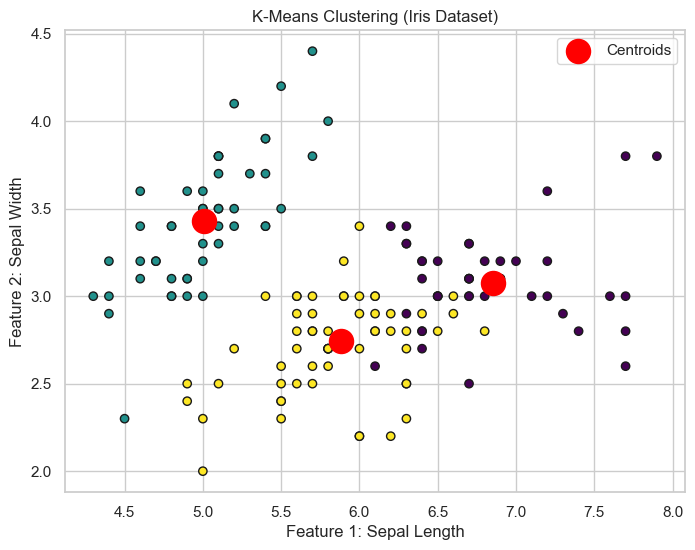

In [7]:
# Визуализация кластеров
plot_clusters(X, y_kmeans, 'K-Means Clustering (Iris Dataset)', kmeans.cluster_centers_)

In [8]:
# Оценка качества кластеризации с помощью силуэтного коэффициента
print(f'Silhouette Score for K-Means: {silhouette_score(X, y_kmeans)}\n')

Silhouette Score for K-Means: 0.5511916046195919



In [9]:
# 2. DBSCAN (кластеризация, основанная на плотности)
print("2. DBSCAN Clustering")
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

2. DBSCAN Clustering


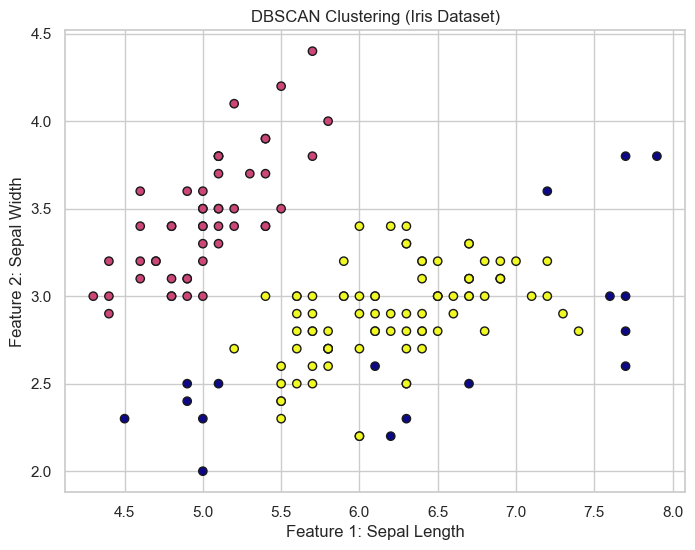

In [10]:
# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='plasma', marker='o', edgecolor='k')
plt.title('DBSCAN Clustering (Iris Dataset)')
plt.xlabel('Feature 1: Sepal Length')
plt.ylabel('Feature 2: Sepal Width')
plt.show()

In [11]:
# Оценка качества кластеризации для DBSCAN
print(f'Silhouette Score for DBSCAN: {silhouette_score(X[y_dbscan != -1], y_dbscan[y_dbscan != -1])}\n')

Silhouette Score for DBSCAN: 0.7353564754798495



In [12]:
# 3. Агломеративная кластеризация (иерархическая кластеризация)
print("3. Agglomerative Clustering")
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_agg = agg_clust.fit_predict(X)

3. Agglomerative Clustering


C:\Users\Alexandr\AppData\Local\Temp\ipykernel_10472\2744683146.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


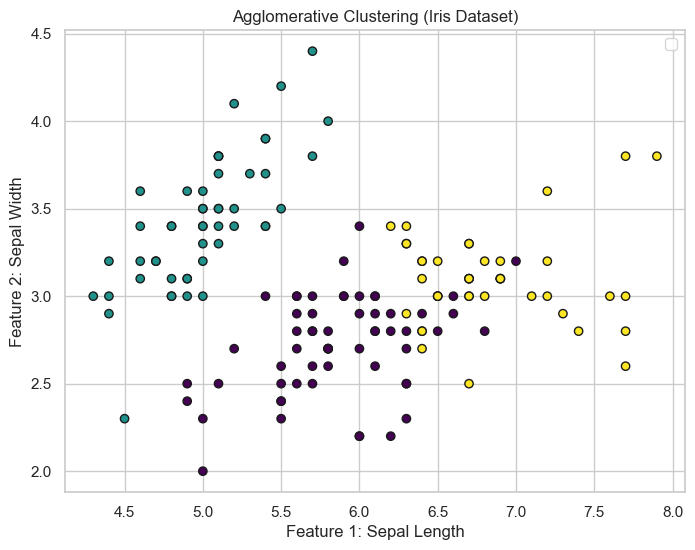

In [13]:
# Визуализация кластеров
plot_clusters(X, y_agg, 'Agglomerative Clustering (Iris Dataset)')

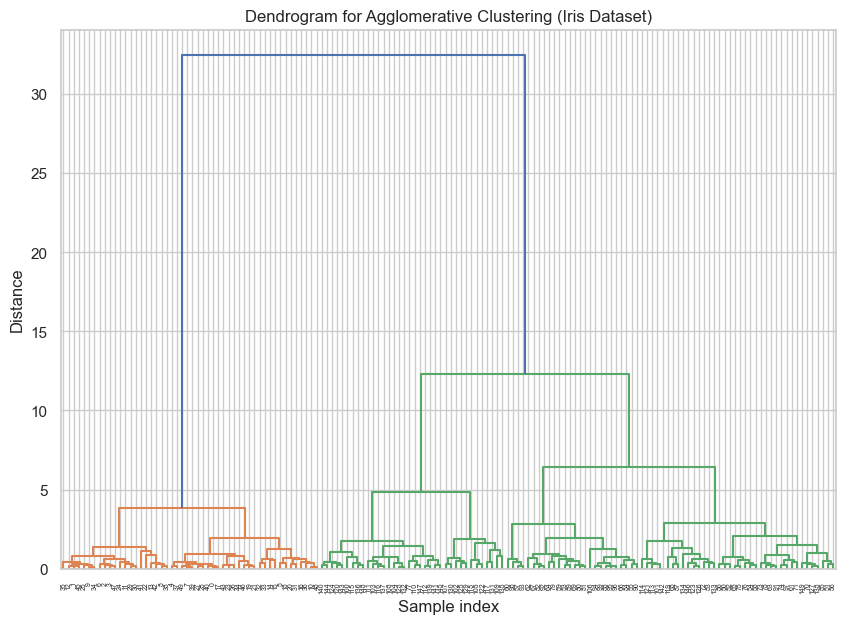

In [14]:
# Дендрограмма для агломеративной кластеризации
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering (Iris Dataset)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [15]:
# Оценка качества кластеризации
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_score(X, y_agg)}\n')

Silhouette Score for Agglomerative Clustering: 0.5543236611296419



In [16]:
# 4. Gaussian Mixture Model (GMM, вероятностная кластеризация)
print("4. Gaussian Mixture Model Clustering")
gmm = GaussianMixture(n_components=3, random_state=42)
y_gmm = gmm.fit_predict(X)

4. Gaussian Mixture Model Clustering


C:\Users\Alexandr\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\Alexandr\AppData\Local\Temp\ipykernel_10472\2744683146.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


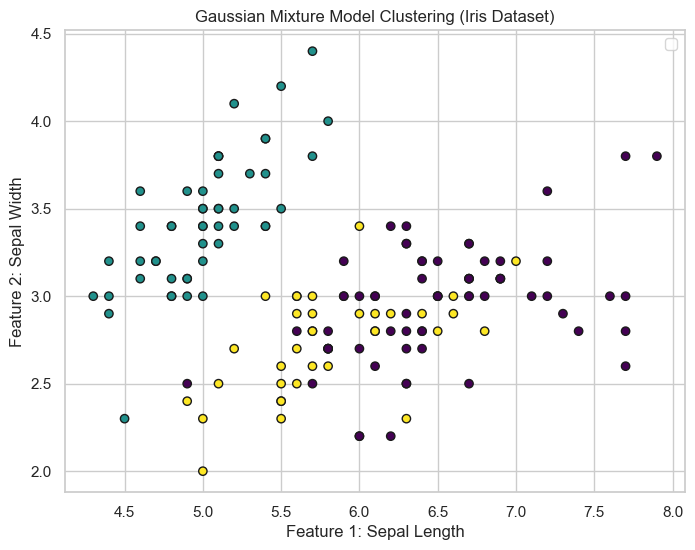

In [17]:
# Визуализация кластеров
plot_clusters(X, y_gmm, 'Gaussian Mixture Model Clustering (Iris Dataset)')

In [18]:
# Оценка качества кластеризации
print(f'Silhouette Score for GMM: {silhouette_score(X, y_gmm)}\n')

Silhouette Score for GMM: 0.5011761635067206

